In [1]:
import numpy as np
from numpy import exp
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import scipy

In [2]:
pop_size = 3.3e8
gamma = 1/18
sigma = 1/5.2

def F(x,t,R0=1.6):
    s,e,i=x
    beta = R0(t) * gamma if callable(R0) else R0 * gamma
    ne = beta * s * i
    ds = -ne
    de = ne - sigma * e
    di = sigma * e - gamma * i
    return ds, de, di

i_0 = 1e-7
e_0 = 4*i_0
s_0 = 1 - i_0 - e_0
x_0 = s_0, e_0, i_0


def solve_path(R0,t_vec,x_init=x_0):
    G = lambda x,t: F(x,t,R0)
    s_path, e_path, i_path = odeint(G,x_init,t_vec).transpose()
    c_path = 1 - s_path - e_path
    return i_path, c_path

In [3]:
t_length = 550
grid_size = 1000
t_vec = np.linspace(0, t_length, grid_size)
R0_vals = np.linspace(1.6,3.0,6)
labels = [f'$R0 = {r:.2f}$' for r in R0_vals]
i_paths, c_paths = [],[]

for r in R0_vals:
    i_path, c_path = solve_path(r,t_vec)
    i_paths.append(i_path)
    c_paths.append(c_path)

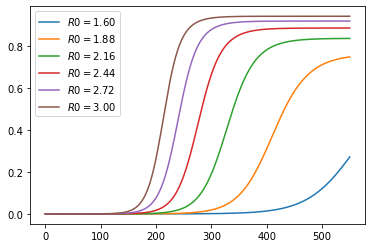

In [4]:
def plot_paths(paths, labels, times = t_vec):
    fig, ax = plt.subplots()
    for path, label in zip(paths, labels):
        ax.plot(times, path, label=label)
    ax.legend(loc='upper left')
    plt.show()

plot_paths(c_paths,labels)